In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import cohen_kappa_score

wwine = pd.read_csv('winequality-white.csv', delimiter = ';')
rwine = pd.read_csv('winequality-red.csv', delimiter = ';')

# White Wine = 0, Red Wine = 1
wwine['wine_type'] = '0'
rwine['wine_type'] = '1'

wines = pd.concat([wwine, rwine])

X = wines.drop(['wine_type'], axis = 1)
y = wines['wine_type']
y = np.array(y)

In [4]:
# Scaling
X_scaled = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 1)

In [5]:
# Logistic Regression
model_lr = LogisticRegression().fit(X_train, y_train)
model_lr_prediction = model_lr.predict(X_test)
version_lr = accuracy_score(y_test, model_lr_prediction)
version_lr

0.9928205128205129

In [6]:
kappa_lr = cohen_kappa_score(y_test, model_lr_prediction)
kappa_lr

0.9804896316328106

Maximum:  0.994
Mean:  0.9786052104208416


<AxesSubplot:>

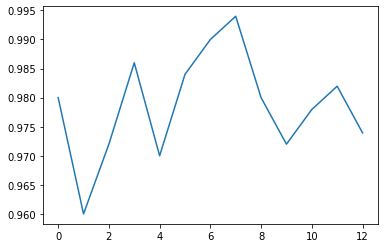

In [7]:
# K-Fold Logistic Regression
lr_plot = cross_val_score(LogisticRegression(), X, y, cv=13)
print('Maximum: ', lr_plot.max())
print('Mean: ', lr_plot.mean())
lr_plot = pd.Series(lr_plot)
lr_plot.plot()

In [8]:
# Decision Tree
model_dt = tree.DecisionTreeClassifier().fit(X_train, y_train)
y_predict = model_dt.predict(X_test)
version_dt = accuracy_score(y_test, y_predict)
version_dt

0.9856410256410256

In [9]:
confus_matrix = pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted White Wine', 'Predicted Red Wine'],
    index=['True White Wine', 'True Red Wine']
    )
confus_matrix

,Predicted White Wine,Predicted Red Wine
True White Wine,1461,13
True Red Wine,15,461


In [10]:
kappa_dt = cohen_kappa_score(y_test, y_predict)
kappa_dt

0.9610348459805945

Maximum:  0.9907692307692307
Mean:  0.9810645964205287


<AxesSubplot:>

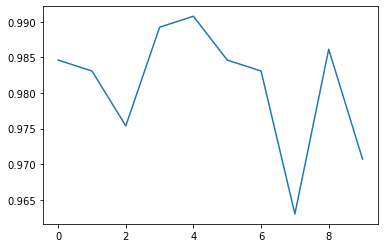

In [11]:
# K-Fold DecisionTree
dt_plot = cross_val_score(tree.DecisionTreeClassifier(max_depth = 7), X, y, cv=10)
print('Maximum: ', dt_plot.max())
#cvs_dt = cross_val_score(tree.DecisionTreeClassifier(max_depth = 7), X, y, cv=10).mean()
print('Mean: ', dt_plot.mean())
dt_plot = pd.Series(dt_plot)
dt_plot.plot()

In [12]:
# KNN
model_knn = KNeighborsClassifier(n_neighbors = 15, metric = 'minkowski', p = 2).fit(X_train, y_train)
model_knn_prediction = model_knn.predict(X_test)
version_knn = accuracy_score(y_test, model_knn_prediction)
version_knn

0.9933333333333333

In [13]:
confus_matrix = pd.DataFrame(
    confusion_matrix(y_test, model_knn_prediction),
    columns=['Predicted White Wine', 'Predicted Red Wine'],
    index=['True White Wine', 'True Red Wine']
    )
confus_matrix

,Predicted White Wine,Predicted Red Wine
True White Wine,1466,8
True Red Wine,5,471


In [14]:
kappa_knn = cohen_kappa_score(y_test, model_knn_prediction)
kappa_knn

0.9819732307810463

Maximum:  0.963076923076923
Mean:  0.9356638615621666


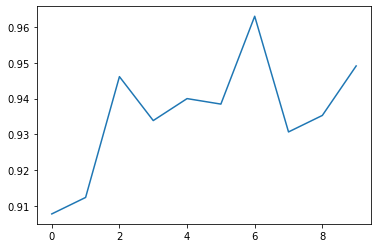

In [15]:
# K-Fold KNN
knn_plot = cross_val_score(KNeighborsClassifier(n_neighbors = 20, metric = 'minkowski', p = 2), X, y, cv=10)
print('Maximum: ', knn_plot.max())
knn_plot = pd.Series(knn_plot)
knn_plot.plot()

print('Mean: ', knn_plot.mean())

In [16]:
# SVM
model_svm = SVC(kernel='linear').fit(X_train, y_train)
model_svm_prediction = model_svm.predict(X_test)
version_svm = accuracy_score(y_test, model_svm_prediction)
version_svm

0.9953846153846154

In [17]:
kappa_svm = cohen_kappa_score(y_test, model_svm_prediction)
kappa_svm

0.9874665596384656

In [18]:
model_svm2 = SVC(kernel='poly').fit(X_train, y_train)
model_svm_prediction2 = model_svm2.predict(X_test)
version_svm2 = accuracy_score(y_test, model_svm_prediction2)
version_svm2

0.9943589743589744

In [19]:
kappa_svm2 = cohen_kappa_score(y_test, model_svm_prediction2)
kappa_svm2

0.9846155611626476

In [20]:
model_svm3 = SVC(kernel='rbf').fit(X_train, y_train)
model_svm_prediction3 = model_svm3.predict(X_test)
version_svm3 = accuracy_score(y_test, model_svm_prediction3)
version_svm3

0.9969230769230769

In [21]:
confus_matrix = pd.DataFrame(
    confusion_matrix(y_test, model_svm_prediction3),
    columns=['Predicted White Wine', 'Predicted Red Wine'],
    index=['True White Wine', 'True Red Wine']
    )
confus_matrix

,Predicted White Wine,Predicted Red Wine
True White Wine,1473,1
True Red Wine,5,471


In [22]:
print(classification_report(y_test,model_svm_prediction3, target_names=['white', 'red']))

              precision    recall  f1-score   support

       white       1.00      1.00      1.00      1474
         red       1.00      0.99      0.99       476

    accuracy                           1.00      1950
   macro avg       1.00      0.99      1.00      1950
weighted avg       1.00      1.00      1.00      1950



In [23]:
kappa_svm3 = cohen_kappa_score(y_test, model_svm_prediction3)
kappa_svm3

0.9916384135569188

In [24]:
# Random Forest
model_rf = RandomForestClassifier(n_estimators=50).fit(X_train, y_train)
model_rf_prediction = model_rf.predict(X_test)
version_rf = accuracy_score(y_test, model_rf_prediction)
version_rf

0.9948717948717949

In [25]:
print(classification_report(y_test,model_rf_prediction, target_names=['dead', 'alive']))

              precision    recall  f1-score   support

        dead       0.99      1.00      1.00      1474
       alive       1.00      0.98      0.99       476

    accuracy                           0.99      1950
   macro avg       1.00      0.99      0.99      1950
weighted avg       0.99      0.99      0.99      1950



In [26]:
kappa_rf = cohen_kappa_score(y_test, model_rf_prediction)
kappa_rf

0.9860241502683363

<AxesSubplot:>

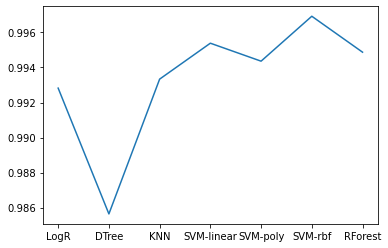

In [27]:
acc = [version_lr, version_dt, version_knn, version_svm, version_svm2, version_svm3, version_rf]
acc = pd.Series(acc)

exploration_methods = ['LogR', 'DTree', 'KNN', 'SVM-linear', 'SVM-poly', 'SVM-rbf', 'RForest']
plt.xticks(np.arange(7) , exploration_methods, rotation = 'vertical')
acc.plot()


<AxesSubplot:>

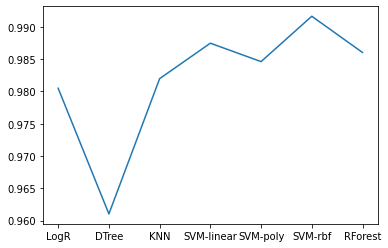

In [28]:
kappa_overview = [kappa_lr, kappa_dt, kappa_knn, kappa_svm, kappa_svm2, kappa_svm3, kappa_rf]
kappa_overview = pd.Series(kappa_overview)

#exploration_methods = ['LogR', 'DTree', 'KNN', 'SVM-linear', 'SVM-poly', 'SVM-rbf', 'RForest']
plt.xticks(np.arange(7), exploration_methods, rotation='45')
kappa_overview.plot()

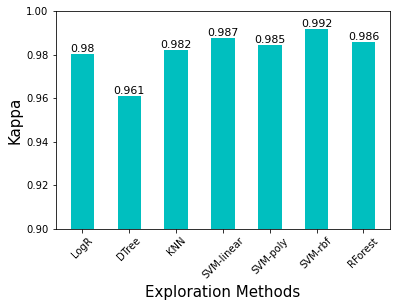

In [29]:
plt.bar(x=exploration_methods, height = kappa_overview, color = 'c', width = 0.5)
#plt.grid()
#plt.title('Efficiency of Machine Learning in Prediction of Wine Types by Chemical Measures')
plt.xlabel('Exploration Methods', fontsize=15)
plt.ylabel('Kappa', fontsize=15)
plt.ylim(0.9, 1.0)
plt.xticks(rotation=45)

for i in range(7):
  plt.text(
      x = i, 
      y = kappa_overview[i], 
      s = round(kappa_overview[i], 3), 
      horizontalalignment='center',
      verticalalignment='bottom',
      size = 11)

plt.show()